In [71]:
import numpy as np
from numpy import around 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import MetaTrader5 as mt5
# import pytz module for working with time zone
import pytz
from datetime import datetime, timedelta 
import os

In [7]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

In [36]:
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2022, 7, 29, tzinfo=timezone)
utc_to = datetime(2022, 8, 30, tzinfo=timezone)
# request AUDUSD ticks within 11.01.2020 - 11.01.2020
ticks = mt5.copy_ticks_range("EURUSD", utc_from, utc_to, mt5.COPY_TICKS_ALL)
print("Ticks received:",len(ticks))

Ticks received: 1366316


In [44]:
# create DataFrame out of the obtained data
ticks = pd.DataFrame(ticks)
# convert time in seconds into the datetime format
ticks['time']=pd.to_datetime(ticks['time'], unit='s')
ticks.head()

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2022-07-29 00:00:00,1.01958,1.01976,0.0,0,1659052800099,134,0.0
1,2022-07-29 00:00:00,1.01956,1.01976,0.0,0,1659052800197,130,0.0
2,2022-07-29 00:00:01,1.01958,1.01976,0.0,0,1659052801518,130,0.0
3,2022-07-29 00:00:02,1.01957,1.01976,0.0,0,1659052802282,130,0.0
4,2022-07-29 00:00:05,1.01960,1.01976,0.0,0,1659052805617,130,0.0


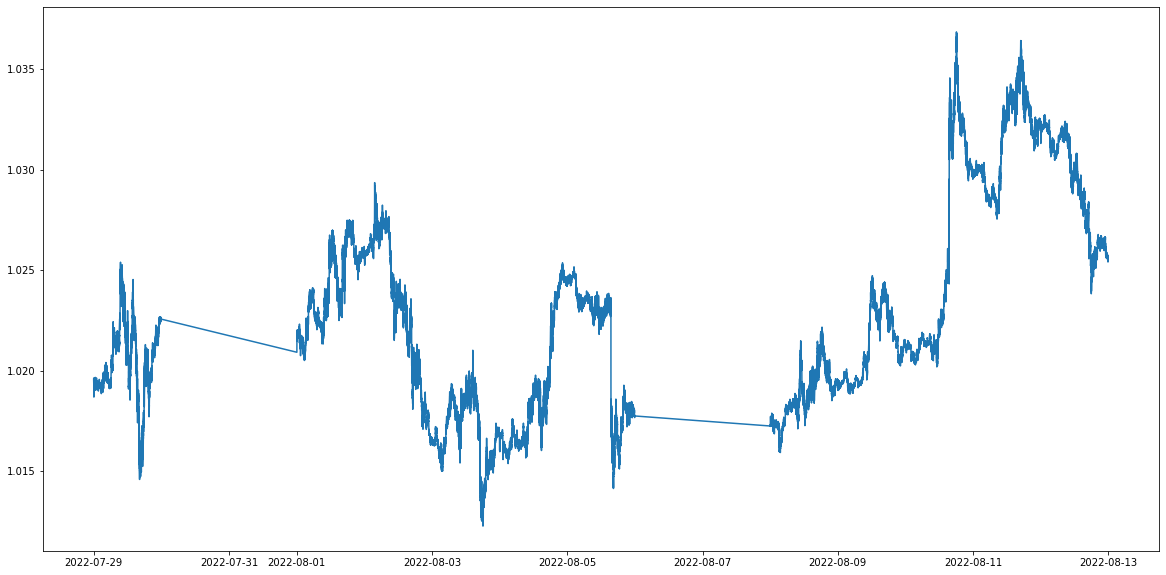

In [68]:
plt.figure(figsize=(20,10))
plt.plot(ticks['time'], ticks['bid'])
# px.line(ticks, x=ticks['time'], y=ticks['bid'] )

In [224]:
df = pd.read_csv('../Data/statement.csv', index_col=[0])
df['Time'] = pd.to_datetime(df['Time'])
df['Time.1'] = pd.to_datetime(df['Time.1'])
df['Duration'] = around( (df['Time.1']- df['Time']).dt.total_seconds() / 60, decimals=2)
# df = df[(df.Time.dt.month == 8) & (df.Time.dt.year == 2022) & (df.Symbol == 'EURUSD')]
df

,id,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Swap,Profit,Duration
0,1487129,2022-08-12 10:26:01,Sell,0.12,EURUSD,1.02988,2022-08-12 10:49:40,1.02922,-0.84,NaN,7.92,23.65
1,1487129,2022-08-11 10:21:05,Buy,0.12,EURUSD,1.03246,2022-08-11 11:58:19,1.03380,-0.84,NaN,16.08,97.23
2,1487129,2022-08-10 11:42:42,Buy,0.12,EURUSD,1.02237,2022-08-10 12:31:15,1.02302,-0.84,NaN,7.80,48.55
3,1487129,2022-08-09 11:00:52,Buy,0.12,EURUSD,1.02159,2022-08-09 11:06:29,1.02230,-0.84,NaN,8.52,5.62
4,1487129,2022-08-08 10:31:54,Buy,0.12,EURUSD,1.01973,2022-08-08 10:38:04,1.02021,-0.84,NaN,5.76,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...
312,1303584,2021-07-26 09:30:00,Sell,0.05,XAUUSD.a,1805.64000,2021-07-26 17:24:46,1798.51000,NaN,NaN,35.65,474.77
313,1303584,2021-07-23 08:15:00,Buy,0.05,XAUUSD.a,1804.29000,2021-07-26 09:17:37,1806.55000,NaN,-0.12,11.30,4382.62
314,1303584,2021-07-23 04:30:00,Sell,0.05,XAUUSD.a,1806.54000,2021-07-23 08:08:03,1804.10000,NaN,NaN,12.20,218.05
315,1303584,2021-07-21 20:17:16,Buy,0.05,XAUUSD.a,1803.16000,2021-07-23 04:26:35,1805.43000,NaN,-0.48,11.35,1929.32


In [228]:
df = pd.read_csv('843451.csv', delimiter=';')
df['Time'] = pd.to_datetime(df['Time'])
df['Time.1'] = pd.to_datetime(df['Time.1'])
df['Duration'] = around( (df['Time.1']- df['Time']).dt.total_seconds() / 60, decimals=2)
df

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Swap,Profit,Duration
0,2022-08-11 23:21:56,Sell,0.35,EURUSD,1.03251,2022-08-11 23:58:36,1.03210,-1.92,NaN,20.19,36.67
1,2022-08-09 23:22:38,Sell,0.34,EURUSD,1.02140,2022-08-10 01:45:09,1.02115,-1.88,2.81,12.21,142.52
2,2022-08-09 23:35:31,Sell,0.34,GBPUSD,1.20762,2022-08-10 00:22:02,1.20779,-1.88,0.65,-8.31,46.52
3,2022-08-09 00:19:57,Sell,0.34,GBPUSD,1.20808,2022-08-09 00:38:26,1.20799,-1.88,NaN,4.38,18.48
4,2022-08-08 23:36:20,Sell,0.34,EURUSD,1.01952,2022-08-09 00:22:03,1.01947,-1.88,2.80,2.44,45.72
...,...,...,...,...,...,...,...,...,...,...,...
841,2020-09-10 23:18:06,Buy,0.01,EURUSD,1.18129,2020-09-10 23:35:28,1.18168,-0.06,NaN,0.54,17.37
842,2020-09-08 23:40:03,Buy,0.01,EURUSD,1.17760,2020-09-09 02:44:27,1.17687,-0.06,-0.07,-1.01,184.40
843,2020-09-08 00:15:04,Sell,0.01,GBPUSD,1.31711,2020-09-08 00:21:42,1.31653,-0.06,NaN,0.80,6.63
844,2020-09-01 05:20:50,Balance,NaN,NaN,NaN,NaT,NaN,NaN,NaN,126.94,NaN


In [229]:
df_8=df[(df.Profit > 0) & (df.Symbol == 'EURUSD')]
temp = df#[(df.Symbol == 'EURUSD')]
# np.log(temp['Duration'])

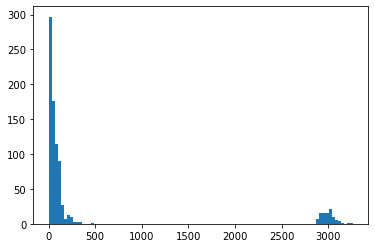

In [234]:
plt.hist(temp['Duration'], bins=100);

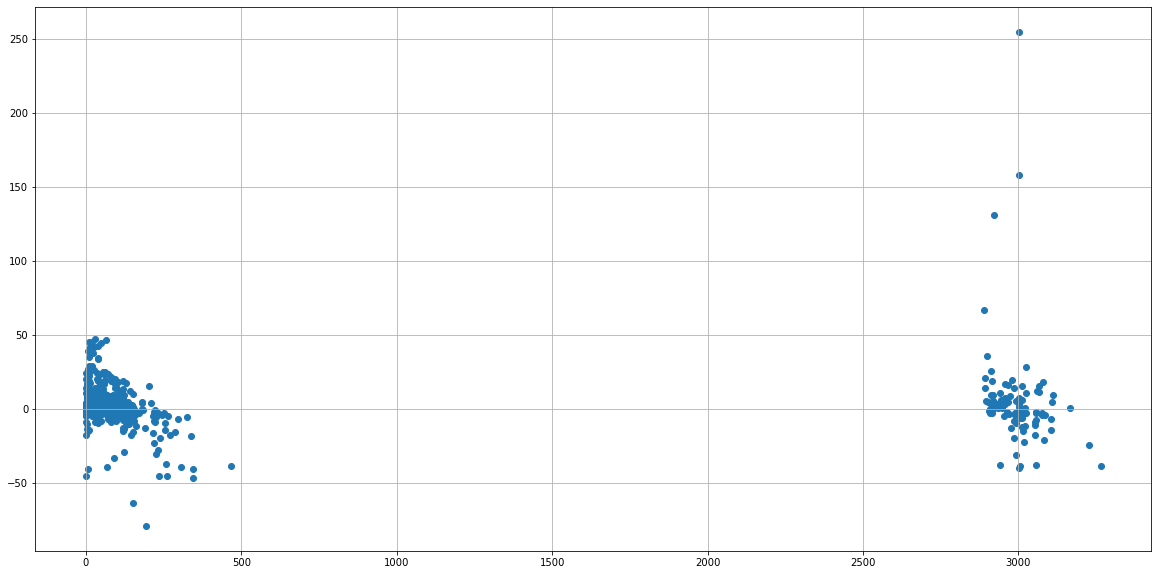

In [236]:
plt.figure(figsize=(20,10))
plt.scatter(temp['Duration'], temp['Profit'])
plt.grid()

In [86]:
df[df['Type'] == 'Sell']['Time'].tail(1)

13   2022-08-01 23:06:29
Name: Time, dtype: datetime64[ns]

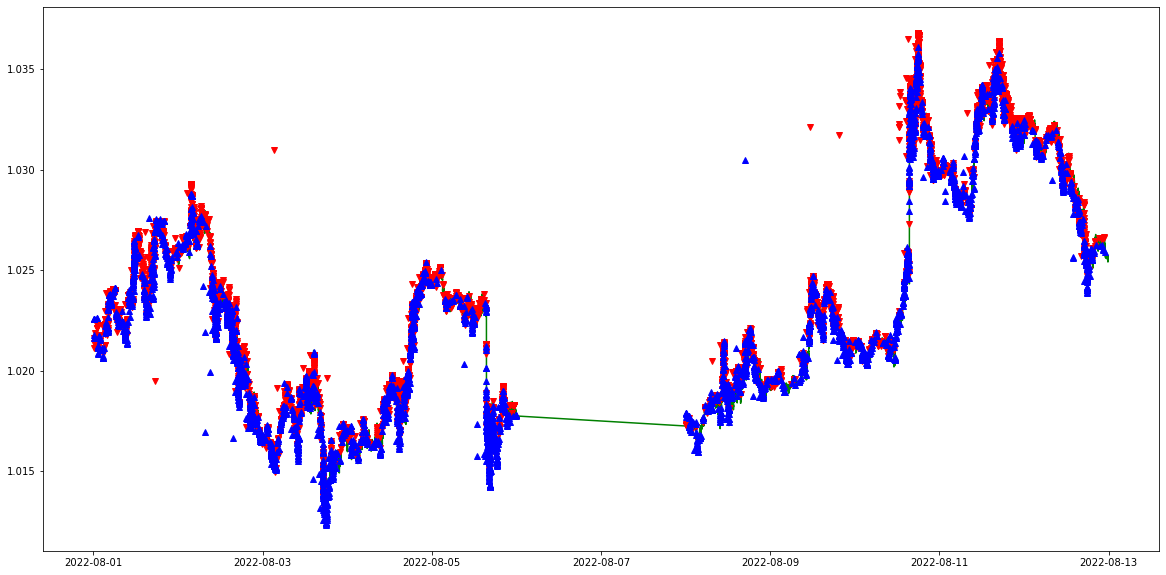

In [112]:
temp = ticks[(ticks.time > datetime(2022, 8, 1, 23, 5, 0))]# & (ticks.time < datetime(2022, 8, 1, 23, 10, 0)) ]

plt.figure(figsize=(20,10))
plt.plot( temp['time'], temp['bid'], 'g')
plt.plot( df_8[df_8['Type'] == 'Sell']['Time'], df_8[df_8['Type'] == 'Sell']['Price'], 'rv')
plt.plot( df_8[df_8['Type'] == 'Buy']['Time'], df_8[df_8['Type'] == 'Buy']['Price'], '^b')

In [238]:
pd.read_csv('../Data/mt5/statistics.csv', index_col=[0])

,id,Trades,Profit Trades,Loss Trades,Best trade,Worst trade,Gross Profit,Gross Loss,Maximum consecutive wins,Maximal consecutive profit,...,Average Loss,Maximum consecutive losses,Maximal consecutive loss,Monthly growth,Annual Forecast,Algo trading,Absolute,Maximal,By Balance,By Equity
0,1487129,393,300 (76.33%),93 (23.66%),58.09 USD,-138.89 USD,2 337.12 USD\r\n (29 157 pips),-827.26 USD\r\n (11 578 pips),23 (223.76 USD),223.76 USD (23),...,-8.90 USD,4 (-20.80 USD),-223.83 USD (2),25.26%,306.53%,0%,0.42 USD,224.95 USD (15.79%),21.74% (224.88 USD),28.01% (232.68 USD)
0,1214100,450,311 (69.11%),139 (30.89%),388.40 USD,-280.60 USD,13 183.09 USD\r\n (150 035 pips),-5 122.88 USD\r\n (85 374 pips),39 (283.88 USD),974.80 USD (9),...,-36.86 USD,10 (-61.07 USD),-560.03 USD (7),16.46%,199.70%,0%,0.00 USD,623.71 USD (11.19%),11.19% (623.71 USD),34.97% (355.56 USD)
0,1368342,711,529 (74.40%),182 (25.60%),381.41 USD,-190.64 USD,10 528.32 USD\r\n (636 983 pips),-3 940.88 USD\r\n (88 931 pips),95 (524.98 USD),692.77 USD (4),...,-21.65 USD,12 (-240.91 USD),-748.81 USD (8),3.46%,41.94%,91%,0.10 USD,769.15 USD (12.20%),6.04% (769.15 USD),23.81% (2 861.97 USD)
0,843451,848,600 (70.75%),248 (29.25%),254.65 AUD,-81.42 AUD,4 472.26 AUD\r\n (25 305 pips),-2 421.43 AUD\r\n (11 087 pips),17 (12.66 AUD),475.66 AUD (5),...,-9.76 AUD,7 (-116.47 AUD),-169.93 AUD (4),8.55%,103.76%,100%,74.21 AUD,202.03 AUD (12.26%),26.58% (146.20 AUD),9.10% (54.92 AUD)
0,798045,6 059,5 252 (86.68%),807 (13.32%),513.73 USD,-501.06 USD,27 682.90 USD\r\n (691 317 pips),-11 962.74 USD\r\n (478 132 pips),64 (43.92 USD),2 276.13 USD (46),...,-14.82 USD,23 (-430.39 USD),-513.36 USD (2),3.78%,45.88%,96%,11.15 USD,555.13 USD (3.45%),16.49% (517.87 USD),34.09% (3 401.59 USD)
0,1559274,196,166 (84.69%),30 (15.31%),62.88 USD,-21.25 USD,540.76 USD\r\n (32 530 pips),-177.12 USD\r\n (15 797 pips),17 (28.63 USD),83.01 USD (10),...,-5.90 USD,2 (-36.37 USD),-36.37 USD (2),42.28%,513.03%,100%,1.54 USD,36.37 USD (13.62%),17.63% (36.37 USD),25.77% (51.95 USD)
0,1526229,1 504,1 192 (79.25%),312 (20.74%),30.11 USD,-129.48 USD,7 053.76 USD\r\n (162 523 pips),-3 681.33 USD\r\n (73 795 pips),77 (216.17 USD),823.58 USD (60),...,-11.80 USD,14 (-335.69 USD),-354.33 USD (7),-2.53%,-30.65%,100%,27.71 USD,358.70 USD (8.84%),25.39% (165.63 USD),29.64% (723.27 USD)
0,1334849,314,235 (74.84%),79 (25.16%),44.96 USD,-11.78 USD,719.42 USD\r\n (41 173 pips),-253.02 USD\r\n (21 446 pips),19 (33.10 USD),64.02 USD (12),...,-3.20 USD,3 (-8.54 USD),-22.31 USD (2),50.45%,612.13%,100%,0.00 USD,22.31 USD (8.48%),10.01% (20.64 USD),46.62% (96.14 USD)
0,802199,6 282,4 811 (76.58%),1 471 (23.42%),4 265.98 EUR,-2 265.51 EUR,191 362.45 EUR\r\n (1 230 783 pips),-73 640.21 EUR\r\n (786 761 pips),156 (6 324.66 EUR),9 308.15 EUR (21),...,-50.06 EUR,80 (-11 384.09 EUR),-11 384.09 EUR (80),6.64%,80.61%,90%,0.00 EUR,11 409.53 EUR (19.25%),9.56% (11 409.53 EUR),47.46% (45 827.69 EUR)
0,790719,1 163,895 (76.95%),268 (23.04%),374.55 USD,-110.70 USD,12 653.72 USD\r\n (227 110 pips),-3 960.11 USD\r\n (82 465 pips),35 (1 299.91 USD),1 299.91 USD (35),...,-14.78 USD,10 (-21.89 USD),-374.39 USD (4),3.06%,37.13%,98%,0.24 USD,374.39 USD (11.67%),6.97% (377.75 USD),48.35% (322.57 USD)


In [3]:
# concat mt5 statement to one file

mypath = '../Data/mt5/'
fileIds = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
if 'statistics.csv' in fileIds:
    fileIds.remove('statistics.csv')

dflist = []
for i in range(len(fileIds)):
    temp = pd.read_csv(mypath + fileIds[i], delimiter=';')
    temp.insert(loc=0, column='id', value=int(fileIds[i].split('.')[0]))
    dflist.append(temp)

In [11]:
temp.columns

Index(['id', 'Time', 'Type', 'Volume', 'Symbol', 'Price', 'Time.1', 'Price.1',
       'Commission', 'Swap', 'Profit', '[NotFound]'],
      dtype='object')

In [46]:
temp = pd.concat(dflist )
# temp = temp.loc[:, ~temp.columns.str.contains('^Unnamed')]
temp = temp[['id', 'Time', 'Type', 'Volume', 'Symbol', 'Price', 'Time.1', 'Price.1', 'Commission', 'Swap', 'Profit']]
temp = temp[ (temp['Type'] == 'Buy') |  (temp['Type'] == 'Sel')]
temp

,id,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Swap,Profit
0,1013219,2022.04.22 12:35:53,Buy,0.01,NZDCAD,0.84623,2022.08.15 19:54:39,0.82115,NaN,-1.08,-19.43
1,1013219,2022.08.11 18:01:01,Buy,0.01,USDCHF,0.94131,2022.08.12 04:07:37,0.94139,NaN,NaN,0.08
2,1013219,2022.07.27 03:09:46,Buy,0.01,NZDCAD,0.80189,2022.08.10 18:01:41,0.82003,NaN,-0.14,14.21
3,1013219,2022.08.02 00:02:22,Buy,0.01,USDJPY,131.51600,2022.08.04 23:54:49,132.52300,NaN,NaN,7.60
4,1013219,2022.07.14 13:47:05,Buy,0.01,EURUSD,0.99527,2022.08.03 14:02:06,1.01439,NaN,-1.57,19.12
...,...,...,...,...,...,...,...,...,...,...,...
463,995747,2021.05.04 15:04:52,Buy,0.01,USDCAD.a,1.23277,2021.06.18 13:48:32,1.23778,-0.08,NaN,4.05
464,995747,2021.05.05 20:29:51,Buy,0.01,USDCHF.a,0.91354,2021.06.18 13:47:46,0.92002,-0.08,0.53,7.04
471,995747,2021.04.29 17:22:57,Buy,0.01,USDCAD.a,1.22996,2021.05.04 15:04:39,1.23250,-0.08,NaN,2.06
472,995747,2021.05.04 14:07:20,Buy,0.01,EURJPY.a,131.18300,2021.05.04 14:07:58,131.15600,-0.08,NaN,-0.25


In [57]:
# (np.unique(temp[temp['Symbol']=='EURUSD']['Volume'].values))[:100]
# Pip Value = (Pip x Trade Size) / Exchange Rate= (0.0001 x 100,000)/1.3=
# (temp['Price.1'] - temp['Price'])*temp['Volume']*100000
# temp['Type'].unique()

In [10]:
mypath = '../Data/mt5/'
# https://www.mql5.com/en/signals/212158?source=Site+Signals+MT5+Table
# https://www.mql5.com/en/signals/1487129?source=Site+Signals+MT5+Table
# https://www.mql5.com/en/signals/843451?source=Site+Signals+MT5+Tile
df = pd.read_csv(mypath + '212158.csv', delimiter=';')
df = df[ (df['Type'] == 'Buy') |  (df['Type'] == 'Sell')]

# calculate Duration
df['Time'] = pd.to_datetime(df['Time'])
df['Time.1'] = pd.to_datetime(df['Time.1'])
df['Duration'] = around( (df['Time.1']- df['Time']).dt.total_seconds() / 60, decimals=2)

# calculate return in pip
df['PipReturn'] = ((df.loc[:,'Price.1'] - df.loc[:,'Price']).values * df.loc[:,'Symbol'].apply(
            lambda x : 100 if (type(x)==str and ( x.lower().find('jpy') != -1 or x.lower().find('xau') != -1)) else 10000
        ).values) * df['Type'].apply(lambda x : -1 if type(x)==str and x.lower().find('sell') != -1 else 1).values

df.head()

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Swap,Profit,Duration,PipReturn
0,2022-08-12 19:27:40,Sell,0.02,GBPUSD,1.21288,2022-08-15 12:14:07,1.20646,NaN,-0.08,12.84,3886.45,64.2
1,2022-08-12 19:27:56,Sell,0.02,EURUSD,1.02536,2022-08-15 11:56:15,1.02044,NaN,0.02,9.84,3868.32,49.2
2,2022-08-10 21:23:43,Sell,0.02,EURUSD,1.03074,2022-08-12 17:54:14,1.02409,NaN,0.09,13.30,2670.52,66.5
3,2022-08-03 21:37:57,Sell,0.01,EURUSD,1.01537,2022-08-12 17:54:14,1.02409,NaN,0.11,-8.72,12736.28,-87.2
4,2022-08-10 21:24:14,Sell,0.01,GBPUSD,1.22363,2022-08-12 13:10:24,1.21367,NaN,-0.16,9.96,2386.17,99.6


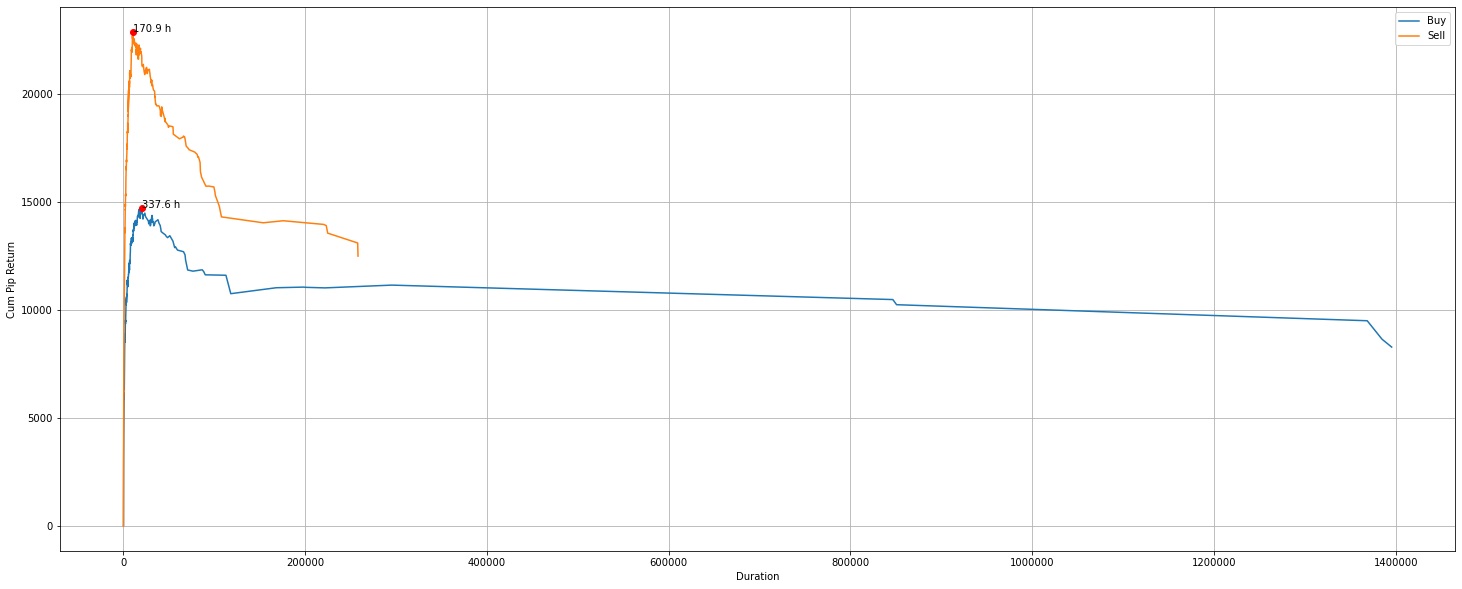

In [14]:
tempB = df[df['Type'] == 'Buy'][['Duration', 'PipReturn']].sort_values(by='Duration', ascending=True)
tempB['cum_PipReturn'] = tempB['PipReturn'].cumsum()
tempS = df[df['Type'] == 'Sell'][['Duration', 'PipReturn']].sort_values(by='Duration', ascending=True)
tempS['cum_PipReturn'] = tempS['PipReturn'].cumsum()

plt.figure(figsize=(25,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.plot(tempB['Duration'], tempB['cum_PipReturn'], label= 'Buy');
x = tempB.iloc[tempB.cum_PipReturn.argmax()]['Duration']
y = tempB.iloc[tempB.cum_PipReturn.argmax()]['cum_PipReturn']
plt.plot(x,y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))

plt.plot(tempS['Duration'], tempS['cum_PipReturn'], label= 'Sell');
x = tempS.iloc[tempS.cum_PipReturn.argmax()]['Duration']
y = tempS.iloc[tempS.cum_PipReturn.argmax()]['cum_PipReturn']
plt.plot(x, y, 'ro');
plt.annotate( str(around(x/60, 1)) + ' h', (x,y))
plt.xlabel('Duration')
plt.ylabel('Cum Pip Return')
plt.legend();

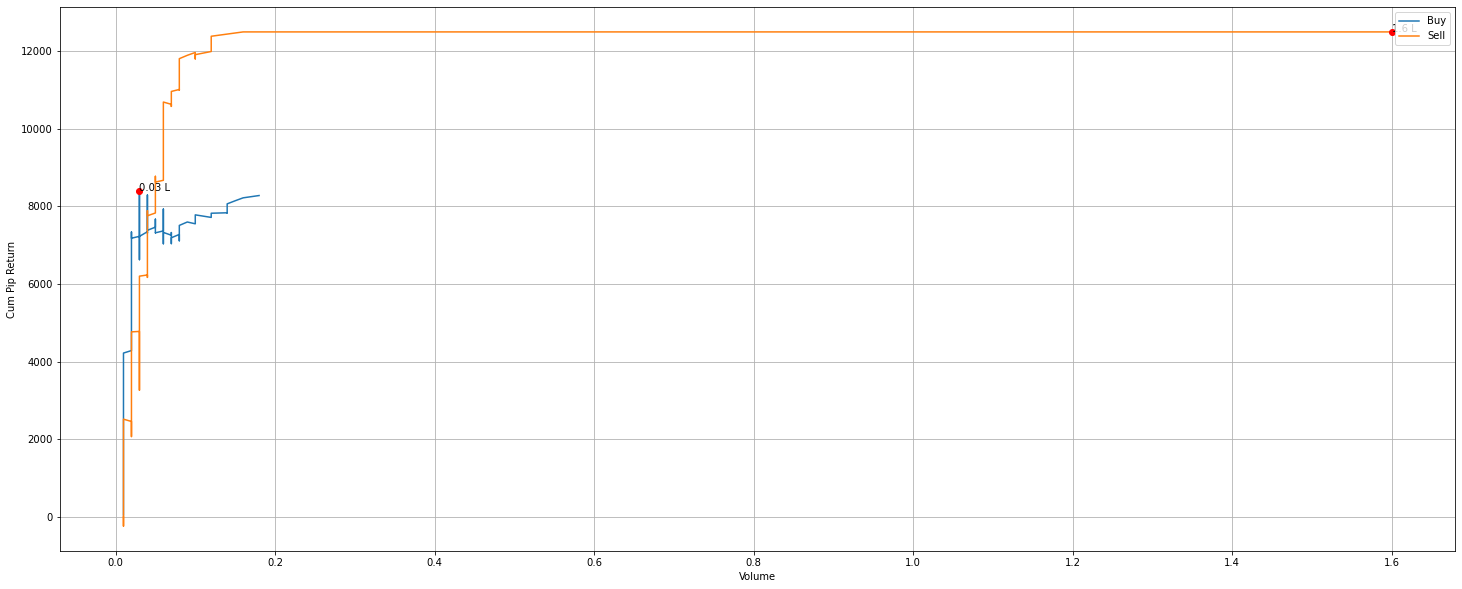

In [15]:
tempB = df[df['Type'] == 'Buy'][['Volume', 'PipReturn']].sort_values(by='Volume', ascending=True)
tempB['cum_PipReturn'] = tempB['PipReturn'].cumsum()
tempS = df[df['Type'] == 'Sell'][['Volume', 'PipReturn']].sort_values(by='Volume', ascending=True)
tempS['cum_PipReturn'] = tempS['PipReturn'].cumsum()

plt.figure(figsize=(25,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.plot(tempB['Volume'], tempB['cum_PipReturn'], label= 'Buy');
x = tempB.iloc[tempB.cum_PipReturn.argmax()]['Volume']
y = tempB.iloc[tempB.cum_PipReturn.argmax()]['cum_PipReturn']
plt.plot(x,y, 'ro');
plt.annotate( str(x) + ' L', (x,y))

plt.plot(tempS['Volume'], tempS['cum_PipReturn'], label= 'Sell');
x = tempS.iloc[tempS.cum_PipReturn.argmax()]['Volume']
y = tempS.iloc[tempS.cum_PipReturn.argmax()]['cum_PipReturn']
plt.plot(x, y, 'ro');
plt.annotate( str(x) + ' L', (x,y))
plt.xlabel('Volume')
plt.ylabel('Cum Pip Return')

plt.legend();

In [196]:
df.head()

,Time,Type,Volume,Symbol,Price,Time.1,Price.1,Commission,Swap,Profit,Duration,PipReturn
0,2022-08-12 19:27:40,Sell,0.02,GBPUSD,1.21288,2022-08-15 12:14:07,1.20646,NaN,-0.08,12.84,3886.45,64.2
1,2022-08-12 19:27:56,Sell,0.02,EURUSD,1.02536,2022-08-15 11:56:15,1.02044,NaN,0.02,9.84,3868.32,49.2
2,2022-08-10 21:23:43,Sell,0.02,EURUSD,1.03074,2022-08-12 17:54:14,1.02409,NaN,0.09,13.30,2670.52,66.5
3,2022-08-03 21:37:57,Sell,0.01,EURUSD,1.01537,2022-08-12 17:54:14,1.02409,NaN,0.11,-8.72,12736.28,-87.2
4,2022-08-10 21:24:14,Sell,0.01,GBPUSD,1.22363,2022-08-12 13:10:24,1.21367,NaN,-0.16,9.96,2386.17,99.6


In [206]:
temp.head()

,Time,PipReturn
1653,2016-07-20 11:33:19,38.0
1655,2016-07-20 11:33:31,50.0
1652,2016-07-20 11:37:24,12.0
1650,2016-07-20 14:16:29,34.0
1654,2016-07-20 20:38:02,17.0


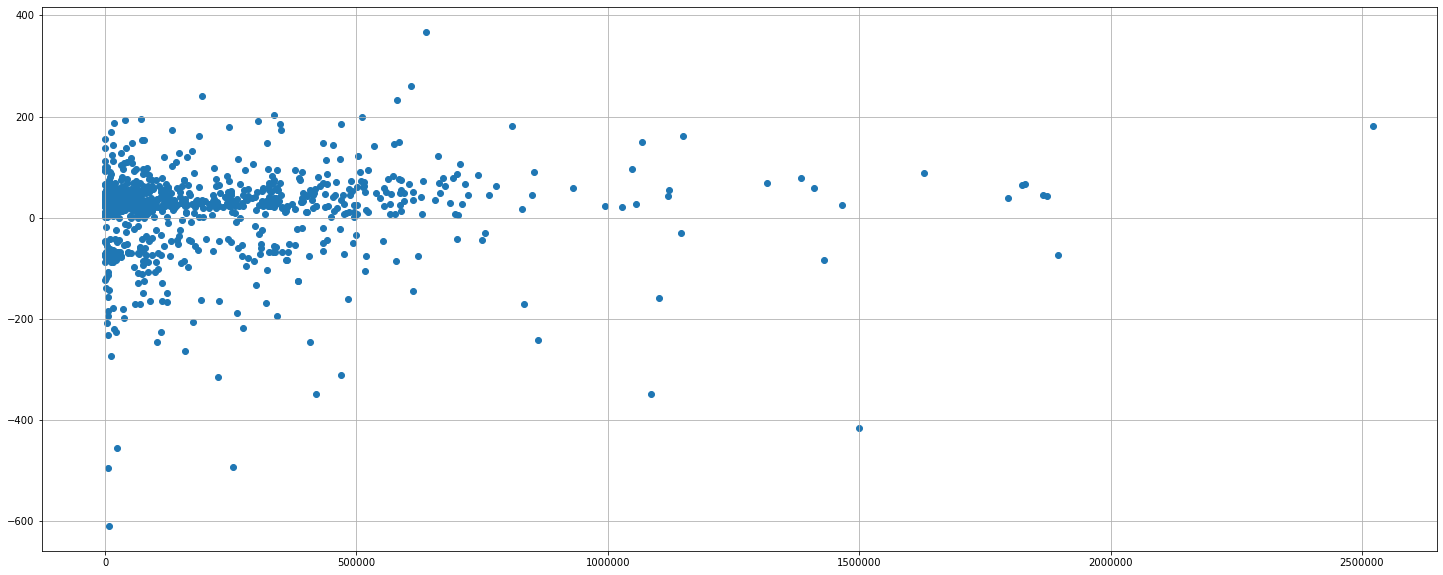

In [224]:
temp = df[df['Type'] == 'Sell'][['Time', 'PipReturn']].sort_values(by='Time', ascending=True)
temp['TimeDiff'] = temp['Time'].diff(1).dt.total_seconds()
temp.fillna(0, inplace=True)
temp = temp.sort_values(by='TimeDiff', ascending=True)

# temp['cum_PipReturn'] = temp['PipReturn'].cumsum()
# tempS = df[df['Type'] == 'Sell'][['Volume', 'PipReturn']].sort_values(by='Volume', ascending=True)
# tempS['cum_PipReturn'] = tempS['PipReturn'].cumsum()

plt.figure(figsize=(25,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()

plt.scatter(temp['TimeDiff'], temp['PipReturn'])

# plt.plot(temp['TimeDiff'], temp['cum_PipReturn'], label= 'Buy');
# x = temp.iloc[temp.cum_PipReturn.argmax()]['TimeDiff']
# y = temp.iloc[temp.cum_PipReturn.argmax()]['cum_PipReturn']
# plt.plot(x,y, 'ro');
# plt.annotate( str(x) + ' L', (x,y))

# plt.plot(tempS['Volume'], tempS['cum_PipReturn'], label= 'Sell');
# x = tempS.iloc[tempS.cum_PipReturn.argmax()]['Volume']
# y = tempS.iloc[tempS.cum_PipReturn.argmax()]['cum_PipReturn']
# plt.plot(x, y, 'ro');
# plt.annotate( str(x) + ' L', (x,y))
# plt.legend();
